# V. Exploratory Data Analysis Before Cleaning Data <a class="anchor" id="EDA"></a>

## 1. Cancerous Patient <a class="anchor" id="eda1"></a>

- First, determine how many patients have cancerous cell types and how many patients do not.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from PIL import Image, ImageOps

label_df = pd.read_csv("./data_labels_mainData.csv")
label_extra_df = pd.read_csv("./data_labels_extraData.csv")

- We combine the two datasets and remove the 'cellType' column from the main dataset because it does not exist in the other.

In [10]:
combined_data_df = label_df[["patientID", "isCancerous"]].append(label_extra_df[["patientID", "isCancerous"]])
combined_data_df 

C:\Users\PC\AppData\Local\Temp\ipykernel_8292\892480181.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,patientID,isCancerous
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
10379,99,0
10380,99,0
10381,99,0
10382,99,0


In [11]:
cancerous_patient_df = pd.DataFrame(combined_data_df.groupby("patientID").any()["isCancerous"].value_counts(sort=False))
figure1 = px.bar(
    data_frame = cancerous_patient_df, 
    y = "isCancerous", 
    labels = {"isCancerous": "Number of Patients", "index": "Status"},
    text_auto = True,
)

figure1.update_layout(
    xaxis=dict(
        tickmode="array",
        tickvals=[1, 0],
        ticktext=["Cancerous", "Non-Cancerous"],
        tickfont=dict(size=14)
    )
)

figure1.show()

- We can see that there are a total of 98 distinct patient IDs. Out of the 98 patients, 51 have at least one cancerous cell (52%), and 47 have no cancerous cells (48%).

## 2. Cancerous Cells <a class="anchor" id="eda2"></a>

- Next, count the total cancerous cells and non-cancerous cells.

In [4]:
total_cancerous_cells_df = combined_data_df["isCancerous"].value_counts().to_frame().reset_index()
total_cancerous_cells_df

,index,isCancerous
0,0,13211
1,1,7069


In [5]:
figure2 = px.bar(
    total_cancerous_cells_df,
    x = "index",
    y = "isCancerous",
    labels={"isCancerous": "Number of cells", "index": "Status"},
    text_auto=True,
)

figure2.update_layout(
    xaxis=dict(
        tickmode="array",
        tickvals=[1, 0],
        ticktext=["Cancerous", "Non-Cancerous"],
        tickfont=dict(size=14)
    )
)

figure2.show()

- There appear to be two categories of cells: cancerous and non-cancerous.
- We can observe that the number of non-cancerous cells nearly doubles that of cancerous cells.
- We will need to be careful of this large label imbalance later on when developing models for cancerous classification.

## 3. Cell Types' Frequency <a class="anchor" id="eda3"></a>

- Next, investigate the frequency of each cell type.

In [6]:
cell_type_freq = pd.DataFrame(label_df["cellType"].value_counts())
cell_type_freq = cell_type_freq.rename(index={0: "Fibroblast", 1: "Inflammatory", 2: "Epithelial", 3: "Others"})
cell_type_freq

,cellType
Epithelial,4079
Inflammatory,2543
Fibroblast,1888
Others,1386


In [7]:
figure3 = px.bar(
    cell_type_freq,
    y = "cellType",
    labels={"cellType": "Amount of cells", "index": "Cell types"}, 
    text_auto=True
)

figure3.show()

- Cells are classified into four types: epithelial, inflammatory, fibroblast, and others.
- We can see from the figure above that 'Epithelial' is the most frequent cell type (41.2%), with 'Inflammatory' being the second most common cell type (25.7%), and 'Fibroblast' third most common (19.1%), with 'Others' being the least common in our dataset (14.0%).
- Similarly to cancerous labels, we must keep the high degree of imbalance labels in mind later in the modeling processes.

## 4. Correlation between Cell Types and Cancerous' Status <a class="anchor" id="eda4"></a>

- Next, learn about the correlation between each cell type with the cancerous' status.

In [8]:
corr_df = label_df[["cellType", "isCancerous"]].value_counts().reset_index()
corr_df["cellType"] = corr_df["cellType"].replace({0: "Fibroblast", 1: "Inflammatory", 2: "Epithelial", 3: "Others"})
corr_df["isCancerous"] = corr_df["isCancerous"].replace({0: False, 1: True})
corr_df

,cellType,isCancerous,0
0,Epithelial,True,4079
1,Inflammatory,False,2543
2,Fibroblast,False,1888
3,Others,False,1386


In [9]:
corr_df['isCancerous'] = corr_df['isCancerous'].map({True: 'Cancerous', False: 'Non-Cancerous'})

figure4 = px.bar(
    corr_df,
    x='isCancerous', 
    y= 0, 
    color='cellType', 
    barmode='group',
    labels={'isCancerous': 'Cancerous Status', "y": "Amount of cells"},
    text=corr_df[0],
)

figure4.update_layout(
    xaxis={'categoryorder':'total descending'},
    yaxis_title="Amount of cells",
    uniformtext_minsize=10,
    uniformtext_mode='hide',
)

figure4.show()

- Based on the graph above, we may deduce that the 'epithelial' cell type exclusively corresponded to the malignant label, implying that 'epithelial' is a cell type. This also indicates that if a cell is malignant, it is of the 'epithelial' kind.
- This is critical because we can now utilize the extra dataset ('data_labels_extraData') to enhance the performance of the cell type classification model despite the fact that it lacks cell type data. Because if a cell is cancerous, we know it is of the 'epithelial' type; if not, it is of one of the other three types.

# V. Exploratory Data Analysis After Cleaning Data <a class="anchor" id="EDA"></a>

## 1. Cancerous Patient <a class="anchor" id="eda1"></a>

## 2. Cancerous Cells <a class="anchor" id="eda2"></a>

## 3. Cell Types' Frequency <a class="anchor" id="eda3"></a>

## 4. Correlation between Cell Types and Cancerous' Status <a class="anchor" id="eda4"></a>

## 5. Image sample <a class="anchor" id="eda5"></a>

- Finally, we will sample out some images of each cell type in order to better comprehend the data.

FileNotFoundError: [Errno 2] No such file or directory: './patch_images/844.png'

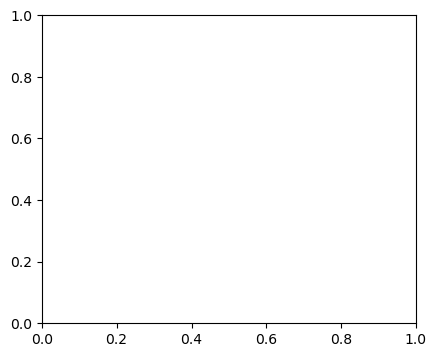

In [7]:
img_dir = "./patch_images/"
cellTypeName = {0: "fibroblast", 1: "inflammatory", 2: "epithelial", 3: "others"}

for cell in range(4):
    cell_df = label_df[label_df["cellType"] == cell].sample(4)
    plt.figure(figsize=(28, 4))
    for image_index, image_name in enumerate(cell_df["ImageName"]):
        plt.subplot(1, 5, image_index + 1)
        img = Image.open(img_dir + image_name)
        plt.imshow(img)
        plt.title(cellTypeName[cell])